In [10]:
# importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [11]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [12]:
all_countries = [
    
    'Argentina', 'Australia', 'Bulgaria',
    'Belize', 'Brazil', 'Canada', 'Denmark',
    'France', 'Hungary', 'Kazakhstan',
    'Lithuania', 'Latvia', 'Paraguay',
    'Ukraine', 'Uruguay', 'United States of America',
    'Belarus', 'Botswana', 'Estonia',
    'Finland', 'Georgia', 'Iran', 'Libya',
    'Lesotho', 'Moldova', 'Mongolia',
    'Norway', 'New Zealand', 'Poland',
    'Portugal', 'Russia', 'Swaziland',
    'Tunisia',
    'United Arab Emirates', 'Belgium',
    'Brunei', 'Cyprus', 'Djibouti', 'Algeria',
    'Gambia', 'Iraq', 'Israel', 'Jordan',
    'Japan', 'South Korea', 'Kuwait',
    'Lebanon', 'Montenegro',
    'Mauritania', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Trinidad and Tobago', 'Yemen',
    'Afghanistan', 'Angola', 'Burundi',
    'Bangladesh', 'Cameroon',
    'Democratic Republic of the Congo',
    'Republic of Congo', 'Dominican Republic', 'Egypt', 'Eritrea', 'Ethiopia',
    'Ghana', 'Guinea Bissau',
    'Guatemala', 'Haiti', 'India', 'Jamaica',
    'Kenya', 'Sri Lanka', 'Madagascar',
    'Mozambique', 'Malawi', 'Niger',
    'Nigeria', 'Nepal', 'Oman', 'Pakistan',
    'Philippines', 'Puerto Rico', 'North Korea', 'Rwanda', 'El Salvador',
    'Syria', 'Togo', 'Uganda',
    'Benin', 'Burkina Faso', 'Bolivia',
    'China', 'Ivory Coast', 'Colombia',
    'Costa Rica', 'United Kingdom',
    'Guinea', 'Honduras', 'Indonesia',
    'Ireland', 'Luxembourg', 'Mexico',
    'Malaysia', 'Panama', 'Sudan',
    'Senegal', 'Sierra Leone', 'Tajikistan',
    'Tanzania', 'Uzbekistan', 'Vietnam',
    'Zambia', 'Gabon', 'Equatorial Guinea',
    'Morocco', 'Peru',
    'Albania', 'Austria', 'Azerbaijan',
    'Bosnia and Herzegovina', 'Chile',
    'Czech Republic', 'Germany', 'Spain',
    'Greece', 'Croatia', 'Italy',
    'Kyrgyzstan', 'Laos', 'Macedonia',
    'Mali', 'Nicaragua', 'Papua New Guinea', 'Romania', 'Somalia',
    'Serbia', 'Slovakia', 'Slovenia',
    'Chad', 'Thailand', 'Turkmenistan',
    'East Timor', 'Turkey', 'Venezuela',
    'Armenia', 'Bhutan', 'Central African Republic', 'Switzerland', 'Cuba',
    'Ecuador', 'Guyana', 'Cambodia',
    'Liberia', 'Myanmar', 'Namibia',
    'Suriname', 'Sweden', 'South Africa',
    'Zimbabwe'
]

countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names = countries_names.iloc[[e in all_countries for e in list(countries_names['name'].values)], :]
countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
7,8,ARE,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,7,...,.ae,NaN,UAE,784.0,971,784.0,UAE,225.0,255.0,225
8,9,ARG,ARG,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,8,...,.ar,RA,ARG,32.0,54,32.0,ARG,9.0,12.0,9


In [13]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,Armenia,Armenia,Armenia,0.124763,ARM,Armenia
1,Australia,Australia,Australia,1.000000,AUS,Australia
2,India,India,India,0.493093,IND,India
3,Indonesia,Indonesia,Indonesia,0.806717,IDN,Indonesia
4,Iran (Islamic Republic of),Iran,Iran (Islamic Republic of),0.209009,IRN,Iran


In [14]:

def sample_var(low=0., high=.5, dist='unif', n=1, seed=42):
    '''
    function to sample var values from a probability distribution
    
    
    low: can be used as lower bound if dist=='unif' or first-order moment o.w.
    high: can be used as upper bound if dist=='unif' or second-order moment o.w.
    '''
    
    if dist=='unif':
        return np.random.uniform(low,high,n)
    if dist=='norm':
        return np.random.normal(low, high, n)
    else:
        return None
    
sample_var(dist='norm')

array([-1.17603857])

In [610]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp1_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [611]:
len(df.ISO3.unique())

234

In [612]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,NaN,NaN,256040250.0


In [620]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-.19
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + 2.3 * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = 2.3 * LS_2000 - feed_food_factor * LS
    
    production = (1-food_waste) / (1-.19) * food + LS + feed_now_food
    demand = get_population(X, year=year) * pop_fact * ADER
    
    return production/demand

cal_suff(df[df.ISO3=='USA'], cntry='USA', year=2050)

3.9091551347024596

In [621]:
def custom_categorization_new(row):
    
    if row['calSuff2000'] > 3 and row['trade'] > 0.8: 
        return 'Exporters' # e.g Brazil, USA, France, Denmark (Greenland)
    
    elif (row['delta_CalSuff_avg'] > 0.6 and row['delta_consistency'] >= 3) or (row['calSuff2000'] > 1.2 and row['delta_consistency'] >= 3 and row['delta_CalSuff_avg'] > 0.2):
        return 'Increasing sufficiency'
    
    elif row['trade'] < 0.1:
        return 'Importers'
    
    elif row['calSuff2000'] < 1.2 and (row['delta_consistency'] <= 1 or row['highest_ssp'] < 0.9):
        return 'Most vulnerable'
    
    elif (row['lowest_ssp'] < 1 or row['calSuff2000'] < 2) and row['delta_CalSuff_avg'] < -0.2 and row['delta_consistency'] <= 1:
        return 'Newly vulnerable'
    
    elif row['calSuff2000'] < 1.2 and row['delta_consistency'] >= 2 and row['lowest_ssp'] > 0.9*row['calSuff2000']:
        return 'Vulnerable but improving'
    
    elif row['delta_consistency'] <= 2 and row['delta_CalSuff_avg'] < -0.1 and row['calSuff2000'] > 2:
        return 'Decreasing but not as vulnerable'
    
    elif row['delta_consistency'] > 0 and row['delta_consistency'] < 4:
        return 'Highly variable'  
    
    return 'Outliers'

In [622]:
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = np.round(.19 * np.array([.5, .75, 1., 1.25, 1.5]), 2)
diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
suffices = []
all_counts = []
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050', '2000']].set_index('Scenario')


cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']


for value in list(values):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    
    for country in list(countries):
        my_diet = cnty_diets[cnty_diets['Region']==country]['2000'].mean()
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')

    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet, food_waste=value)

        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')

    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [406]:
categories = [h for h in header if h != 'Outliers']

for count in all_counts:
    for category in categories:
        if not category in list(count.index):
            count.loc[category, 'ISO3'] = []
            
inter = [set.intersection(*map(set,[count['ISO3'][category] for count in all_counts])) for category in categories]
new_counts = dict(zip(categories, inter))

out = pd.DataFrame(columns=pivot_cols)
out['value'] = values


for i, value in enumerate(list(values)):
        for category in new_counts:
            for ssp in range(5):
                if new_counts[category]:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['ISO3'].isin(new_counts[category])]['ssp'+str(ssp+1)].mean()
                else:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['category']==category]['ssp'+str(ssp+1)].mean()

In [407]:
out.to_csv('sa_population_new.csv', index=False)

## SA for food waste

In [623]:
all_counts_waste = all_counts

In [624]:
all_counts_waste[0]

,ISO3
category,
Decreasing but not as vulnerable,"[AUT, AZE, CHL, CZE, DEU, ESP, HRV, ITA, KGZ, ..."
Exporters,"[ARG, AUS, BGR, BLZ, BRA, CAN, DNK, FRA, HUN, ..."
Highly variable,"[ALB, BIH, BTN, CHE, CIV, COG, CUB, ECU, GIN, ..."
Importers,"[ARE, BEL, BRN, CYP, DJI, DZA, GMB, IRQ, ISR, ..."
Increasing sufficiency,"[ARM, BLR, BWA, EST, FIN, GEO, GUY, IRN, LBY, ..."
Most vulnerable,"[AFG, AGO, BDI, BGD, CMR, COD, DOM, EGY, ERI, ..."
Newly vulnerable,"[BEN, BFA, BOL, CHN, COL, CRI, GBR, HND, IDN, ..."
Vulnerable but improving,"[CAF, GAB, GNQ, MAR, PER]"


In [625]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [22, 21, 17, 14, 11],
 [21, 21, 21, 21, 21],
 [32, 33, 35, 35, 38],
 [19, 21, 24, 30, 34],
 [5, 4, 4, 3, 1],
 [22, 24, 28, 24, 25],
 [23, 20, 15, 16, 14],
 [0, 0, 0, 1, 0])

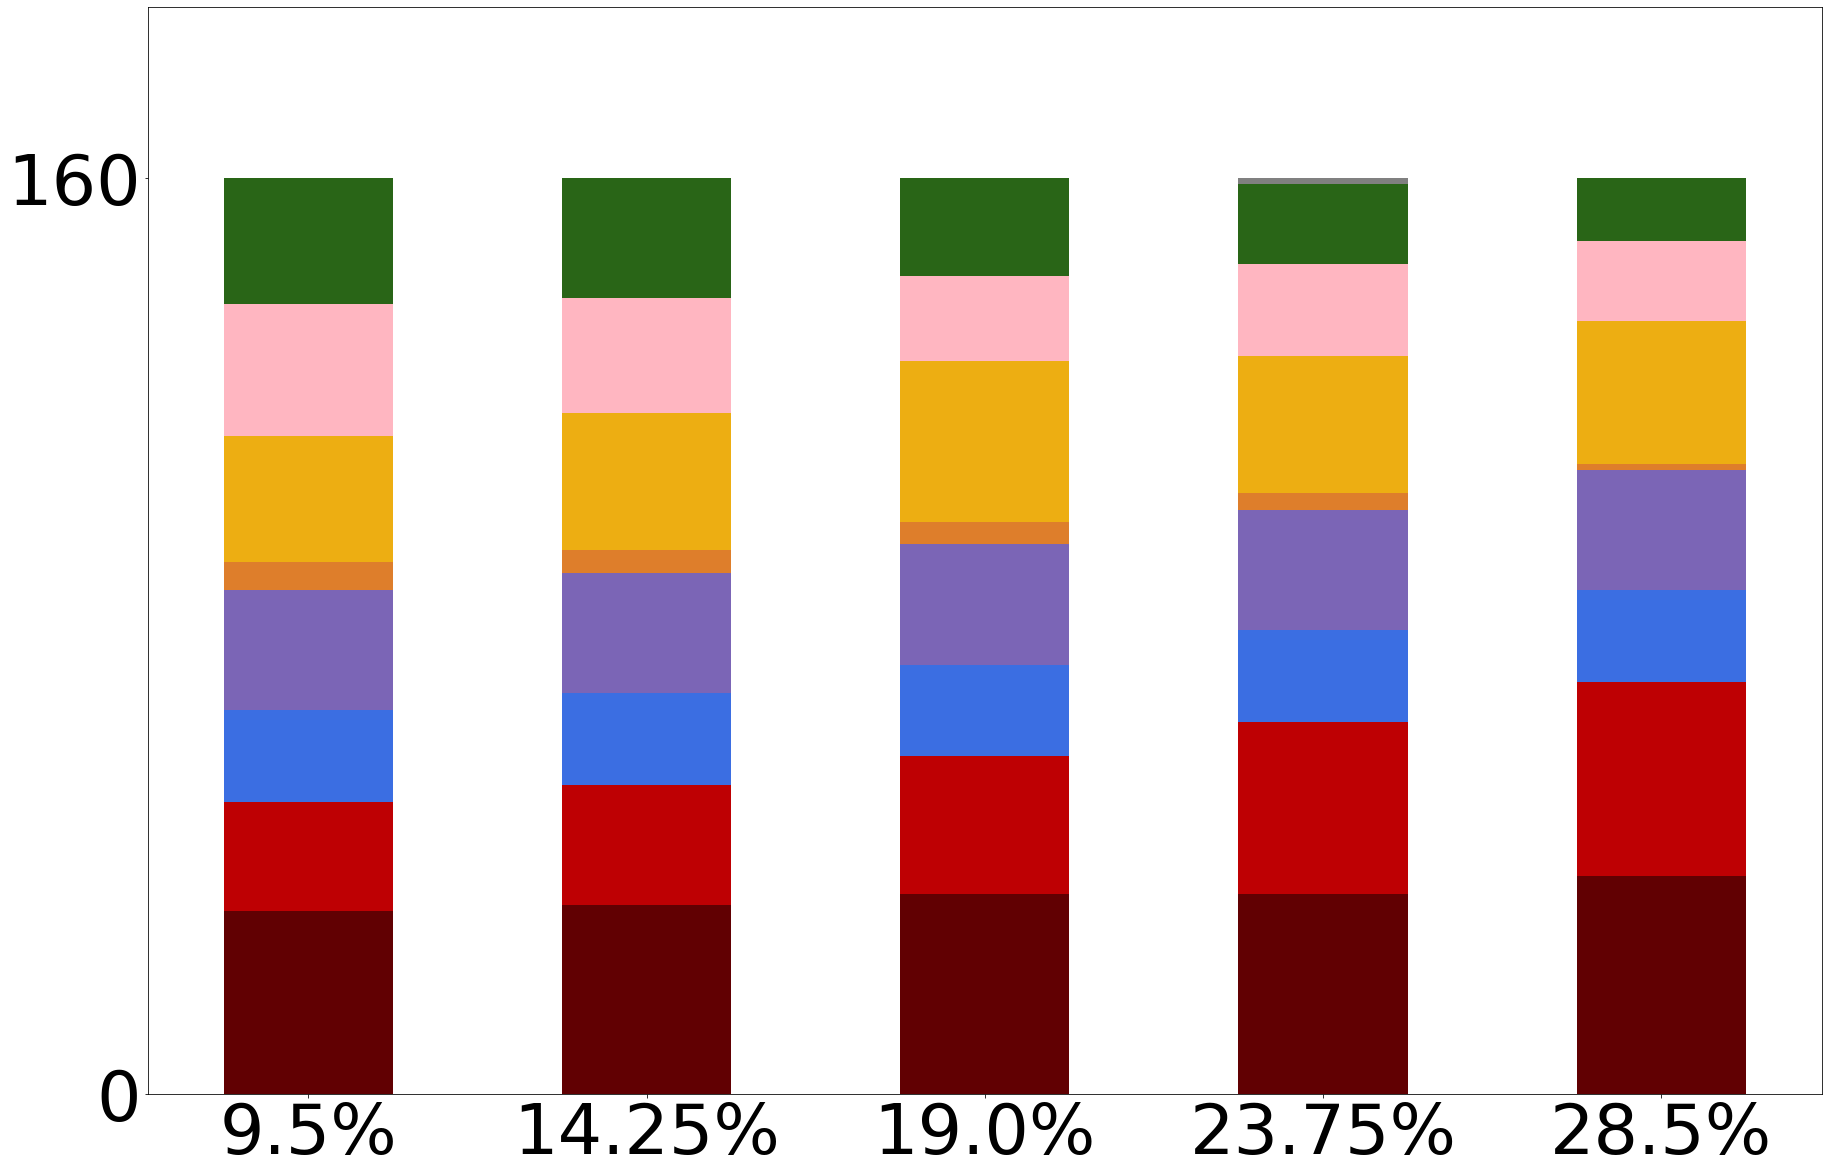

In [869]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')

header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

header = [
    'Most vulnerable (India)', 'Newly vulnerable (Mexico)', 'Exporters (Argentina)', 'Importers (Singapore)', 'Vulnerable but improving (Morocco)',
    'Decreasing but not as vulnerable (Italy)', 'Highly variable', 'Increasing sufficiency (Norway)', 'Global'
]

values = [str(e)+'%' for e in list(np.round(19 * np.array([.5, .75, 1., 1.25, 1.5]),2))]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([22, 21, 17, 14, 11])
cat3 = np.array([21, 21, 21, 21, 21])
cat4 = np.array([32, 33, 35, 35, 38])
cat5 = np.array([19, 21, 24, 30, 34])
cat6 = np.array([5, 4, 4, 3, 1])
cat7 = np.array([22, 24, 28, 24, 25])
cat8 = np.array([23, 20, 15, 16, 14])
cat9 = np.array([0, 0, 0, 1, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=70)
# plt.xlabel('\n% of Food waste', fontsize=70)
plt.ylim([0,190])
plt.yticks([0, 160], fontsize=70)
# plt.ylabel('Number of countries', fontsize=70)


p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')


# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0., fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. food waste')
plt.show()

## SA w.r.t. feed food factor

In [616]:
all_counts_feed_food = all_counts
all_counts_feed_food[0]

,ISO3
category,
Decreasing but not as vulnerable,"[IRL, KGZ, LAO, MLI, NIC, PAN, PNG, SOM, SRB, ..."
Exporters,"[ARG, AUS, BGR, BLZ, BRA, CAN, DNK, FRA, HUN, ..."
Highly variable,"[AZE, BTN, CHL, CHN, CIV, COL, CUB, CZE, DEU, ..."
Importers,"[ARE, BRN, CYP, DJI, DZA, GMB, IRQ, ISR, JOR, ..."
Increasing sufficiency,"[ALB, ARM, AUT, BEL, BIH, BLR, BWA, CHE, EST, ..."
Most vulnerable,"[AFG, AGO, BDI, BGD, CMR, COD, EGY, ERI, ETH, ..."
Newly vulnerable,"[BEN, BFA, BOL, CRI, HND, IDN, LUX, MYS, SDN, ..."
Outliers,[ITA]
Vulnerable but improving,"[CAF, COG, GNQ, MAR, PER]"


In [617]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [37, 21, 17, 13, 8],
 [19, 21, 21, 21, 22],
 [30, 32, 35, 37, 39],
 [12, 19, 24, 30, 34],
 [5, 4, 4, 2, 1],
 [15, 19, 28, 26, 27],
 [25, 27, 15, 14, 13],
 [1, 1, 0, 1, 0])

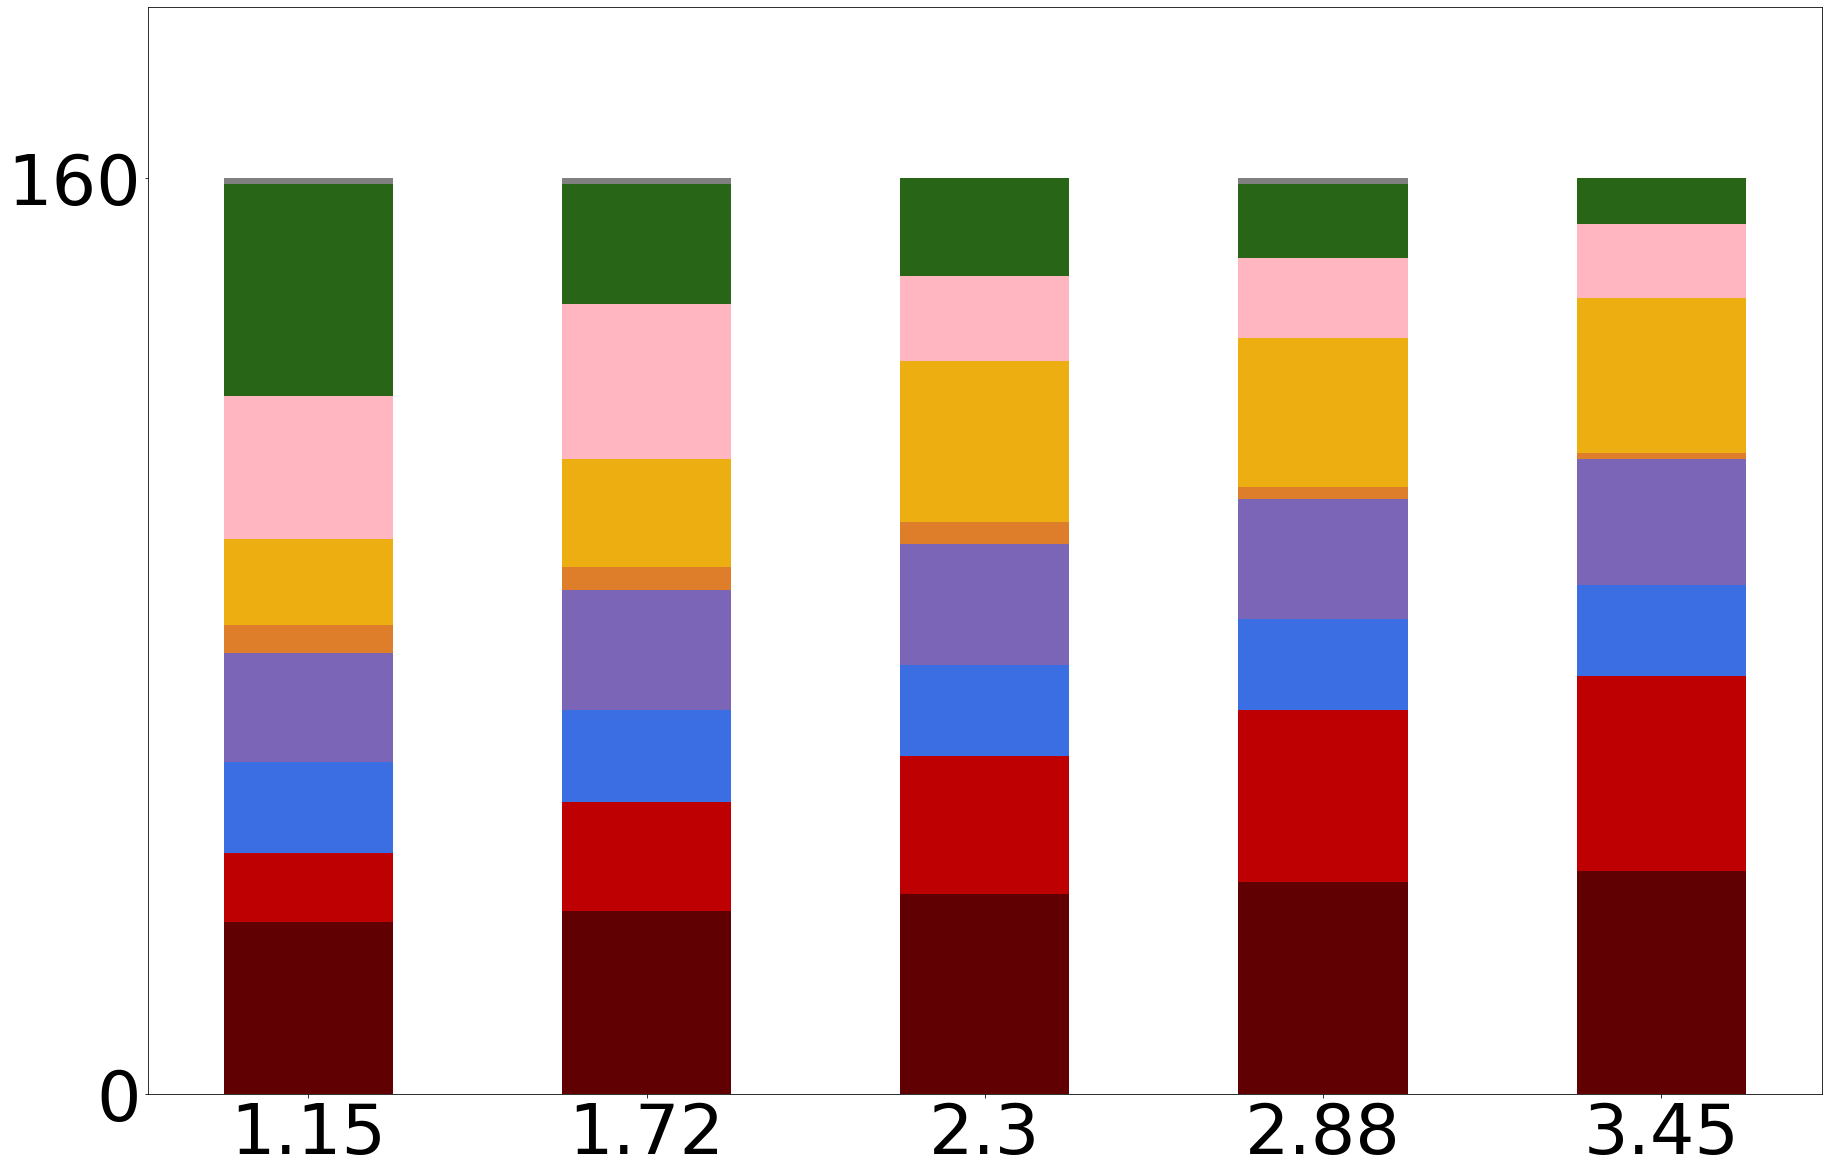

In [868]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = np.round(2.3 * np.array([0.5 , 0.75, 1.  , 1.25, 1.5]),2)

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([37, 21, 17, 13, 8])
cat3 = np.array([19, 21, 21, 21, 22])
cat4 = np.array([30, 32, 35, 37, 39])
cat5 = np.array([12, 19, 24, 30, 34])
cat6 = np.array([5, 4, 4, 2, 1])
cat7 = np.array([15, 19, 28, 26, 27])
cat8 = np.array([25, 27, 15, 14, 13])
cat9 = np.array([1, 1, 0, 1, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=70)
# plt.xlabel('Feed to food factor', fontsize=70)
plt.ylim([0,190])
plt.yticks([0, 160],fontsize=70)
# plt.ylabel('Number of countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')


# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA w.r.t. diet

In [139]:
all_counts_diet = all_counts

In [140]:
all_counts_diet[0]

,ISO3
category,
Decreasing but not as vulnerable,"[AZE, CHL, CZE, DEU, ESP, HRV, KGZ, LAO, MLI, ..."
Exporters,"[ARG, AUS, BGR, BLZ, BRA, CAN, DNK, FRA, HUN, ..."
Highly variable,"[ALB, AUT, BIH, BTN, CAF, CHE, CHN, COG, COL, ..."
Importers,"[ARE, BEL, BRN, CYP, DJI, DZA, GMB, IRQ, ISR, ..."
Increasing sufficiency,"[ARM, BLR, BWA, EST, FIN, GEO, GUY, IRN, LBY, ..."
Most vulnerable,"[AFG, AGO, BDI, BGD, CMR, COD, DOM, EGY, ERI, ..."
Newly vulnerable,"[BEN, BFA, BOL, CIV, CRI, GBR, HND, IDN, IRL, ..."
Vulnerable but improving,"[GAB, GNQ, MAR, PER]"


In [141]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [23, 20, 17, 15, 13],
 [21, 21, 21, 21, 21],
 [32, 34, 35, 36, 37],
 [18, 22, 24, 29, 30],
 [4, 4, 4, 3, 2],
 [19, 25, 28, 24, 26],
 [27, 18, 15, 15, 14],
 [0, 0, 0, 1, 1])

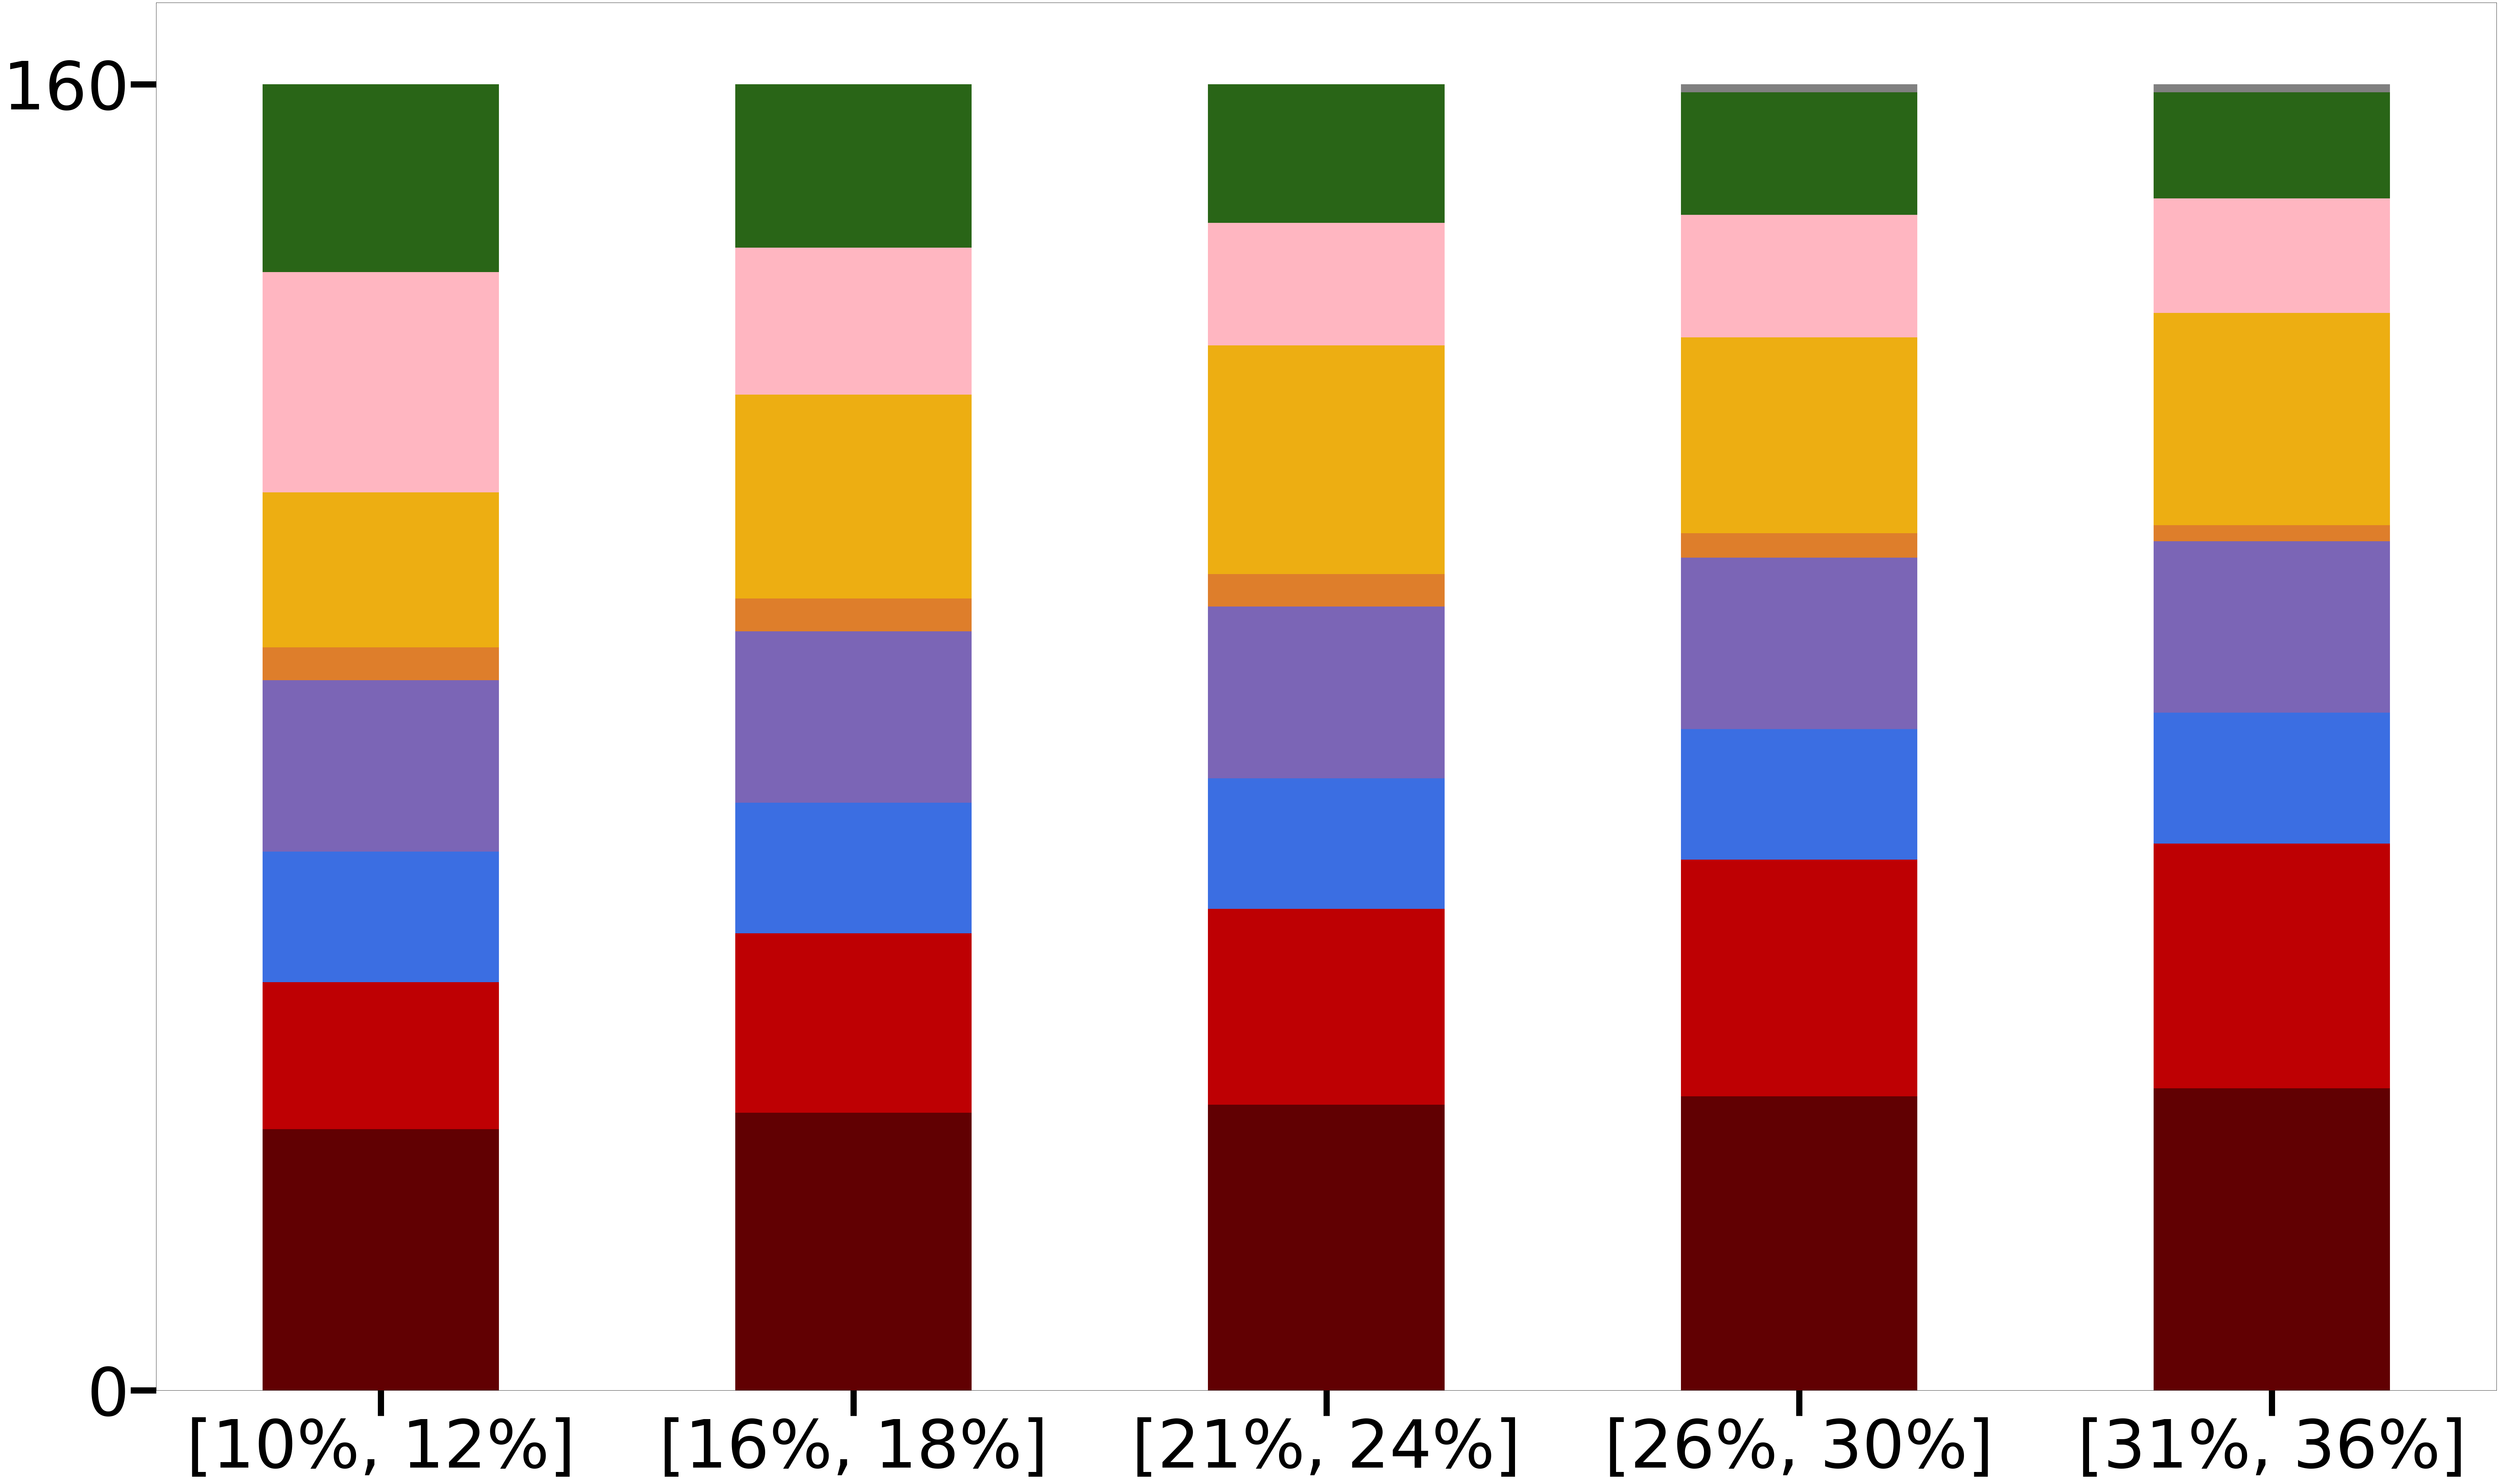

In [1284]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [.5, .75, 1., 1.25, 1.5]
diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
rng = []

for v in values:
    rng.append('[%.0f'%(100 * min([d*v for d in diets])) +'%, '+'%.0f'% (100 * max([d*v for d in diets]))+'%]')
    
values = ['' + r for e, r in zip(values, rng)]
# values = rng

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([23, 20, 17, 15, 13])
cat3 = np.array([21, 21, 21, 21, 21])
cat4 = np.array([32, 34, 35, 36, 37])
cat5 = np.array([18, 22, 24, 29, 30])
cat6 = np.array([4, 4, 4, 3, 2])
cat7 = np.array([19, 25, 28, 24, 26])
cat8 = np.array([27, 18, 15, 15, 14])
cat9 = np.array([0, 0, 0, 1, 1])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})


plt.figure(figsize=(115, 70))
plt.xticks(ind, values, fontsize=182)
# plt.xlabel('\nDistortion of % livestock in diet\nwith corresponding range', fontsize=70)
plt.ylim([0,170])
plt.yticks([0, 160], fontsize=182)
# plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')

ax = plt.gca()
ax.tick_params(width=17, length=70, color='black')

# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA w.r.t. pop_fact

In [43]:
all_counts_pop = all_counts
all_counts_pop[0]

,ISO3
category,
Decreasing but not as vulnerable,"[ALB, AUT, AZE, BFA, BIH, BLR, CHL, CZE, DEU, ..."
Exporters,"[ARG, AUS, BGR, BLZ, BRA, CAN, DNK, FRA, HUN, ..."
Highly variable,"[BEN, BTN, CIV, ETH, FIN, GIN, IRN, MOZ, MWI, ..."
Importers,"[ARE, BEL, BRN, CYP, DJI, DZA, GMB, IRQ, ISR, ..."
Increasing sufficiency,"[BWA, CAF, GAB, GNQ, LBR, LBY, MNG, NAM, NOR, ..."
Most vulnerable,"[AFG, AGO, BDI, BGD, DOM, ECU, EGY, GHA, GTM, ..."
Newly vulnerable,"[ARM, BOL, CHE, CHN, COL, CRI, CUB, GBR, GEO, ..."
Vulnerable but improving,"[CMR, COD, COG, ERI, GNB, LSO, NER, SYR]"


In [60]:
from decimal import Decimal

values = [1.45, 1.53, 1.58, 1.64, 1.72]
pops = []
data_path = 'outputs/compare/'

for i in range(5):
    df = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
    pops.append(df['population_2000'].sum())
    
rng = []

for v in values:
    rng.append('%.2f'% min([pop*v/1e+9 for pop in pops]))
    print('%.2E' % Decimal(str(min([pop*v for pop in pops]))), '%.2E' % Decimal(str(max([pop*v for pop in pops]))))


8.67E+09 8.67E+09
9.14E+09 9.14E+09
9.44E+09 9.44E+09
9.80E+09 9.80E+09
1.03E+10 1.03E+10


In [58]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [10, 9, 7, 7, 7],
 [23, 23, 23, 23, 23],
 [29, 29, 29, 30, 32],
 [22, 22, 23, 26, 30],
 [8, 7, 5, 4, 3],
 [38, 39, 40, 40, 40],
 [14, 15, 17, 14, 9],
 [0, 0, 0, 0, 0])

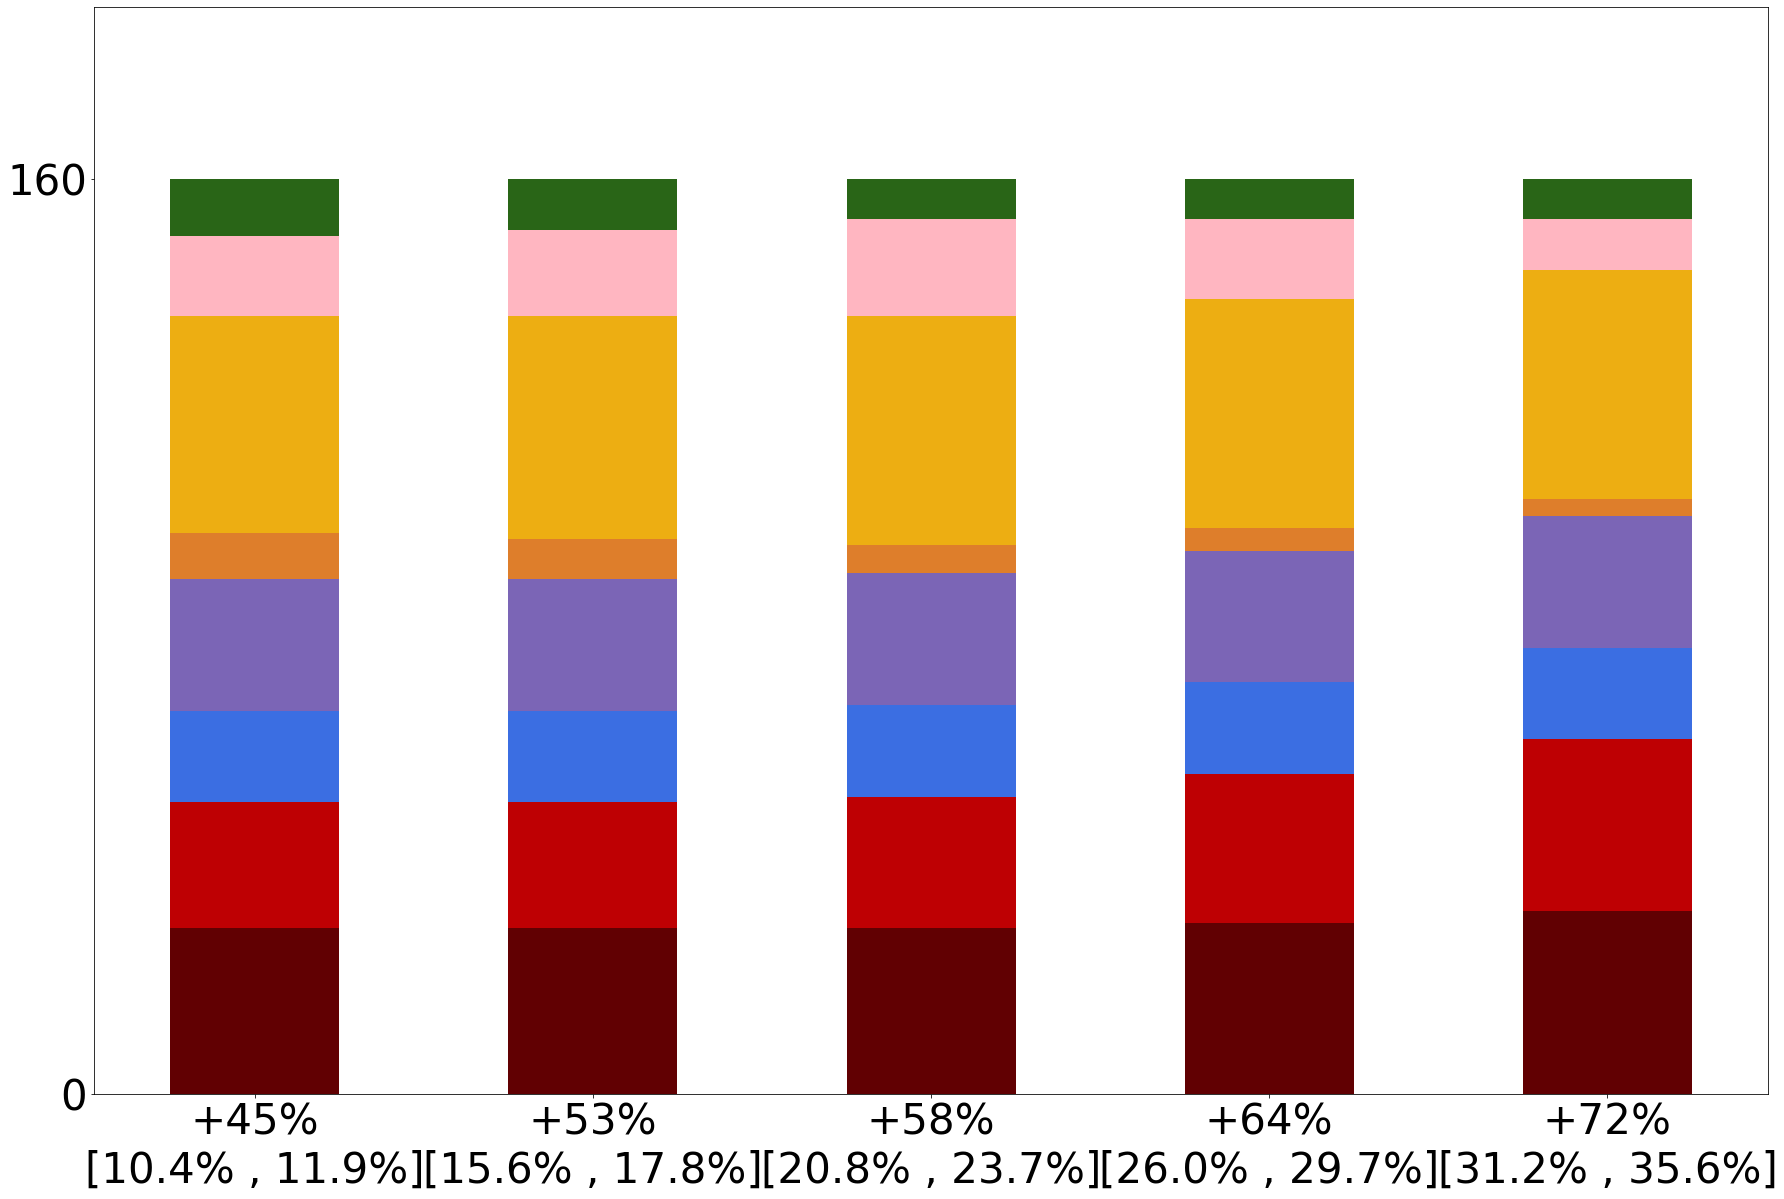

In [843]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [str(e) + '%\n' + str(r) +'' for e, r in zip(['+45', '+53', '+58', '+64', '+72'], rng)]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([10, 9, 7, 7, 7])
cat3 = np.array([23, 23, 23, 23, 23])
cat4 = np.array([29, 29, 29, 30, 32])
cat5 = np.array([22, 22, 23, 26, 30])
cat6 = np.array([8, 7, 5, 4, 3])
cat7 = np.array([38, 39, 40, 40, 40])
cat8 = np.array([14, 15, 17, 14, 9])
cat9 = np.array([0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=42)
# plt.xlabel('\n Population projection (Billions)', fontsize=70)
plt.ylim([0,190])
plt.yticks([0, 160],fontsize=42)
# plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')


# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## Code for SA (Yield and Cropland)

## SA for %cropland

In [28]:
# cnty_diets[cnty_diets['Region']==country]['2050']
country

'CYN'

In [602]:
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']
suffices = []
all_counts = []

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')

values = np.round(np.array([1., 1.05, 1.10, 1.15, 1.20]), 2)
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']
def expansion(x, y):
    if x==0:
        return 0
    else:
        return max(min(1., x+(y-1)),0)

for value in list(values):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    for country in list(countries):
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')
    
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            df_dup = df_ssp[df_ssp['ISO3']==country].copy()
            
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
                
            df_dup['%cropland_2050'] = df_dup['%cropland_2000'].apply(lambda x: expansion(x, value))

            df_dup.loc[:, 'calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_dup, cntry=country, year=2050, diet=my_diet)
    
        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')
    
    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [512]:
categories = [h for h in header if h != 'Outliers']

for count in all_counts:
    for category in categories:
        if not category in list(count.index):
            count.loc[category, 'ISO3'] = []
            
inter = [set.intersection(*map(set,[count['ISO3'][category] for count in all_counts])) for category in categories]
new_counts = dict(zip(categories, inter))

out = pd.DataFrame(columns=pivot_cols)
out['value'] = values


for i, value in enumerate(list(values)):
        for category in new_counts:
            for ssp in range(5):
                if new_counts[category]:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['ISO3'].isin(new_counts[category])]['ssp'+str(ssp+1)].mean()
                else:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['category']==category]['ssp'+str(ssp+1)].mean()

In [574]:
out.to_csv('sa_cropland_new.csv', index=False)

NameError: name 'out' is not defined

In [603]:
all_counts_crop = all_counts
# all_counts_crop[0]

In [1273]:
from decimal import Decimal

cropland_2000 = (df['%cropland_2000'] * df['ha_per_pixel']).sum()

values = [.95, 1., 1.05, 1.15, 1.20]
rng = [  2.56E+09,
         2.89E+09,
         3.21E+09,
         3.52E+09,
         3.81E+09]

In [604]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16],
 [14, 20, 33, 43, 49],
 [21, 20, 20, 19, 19],
 [39, 36, 32, 30, 26],
 [30, 23, 19, 12, 8],
 [4, 7, 5, 2, 6],
 [27, 20, 18, 13, 10],
 [9, 17, 17, 25, 25],
 [0, 1, 0, 0, 1])

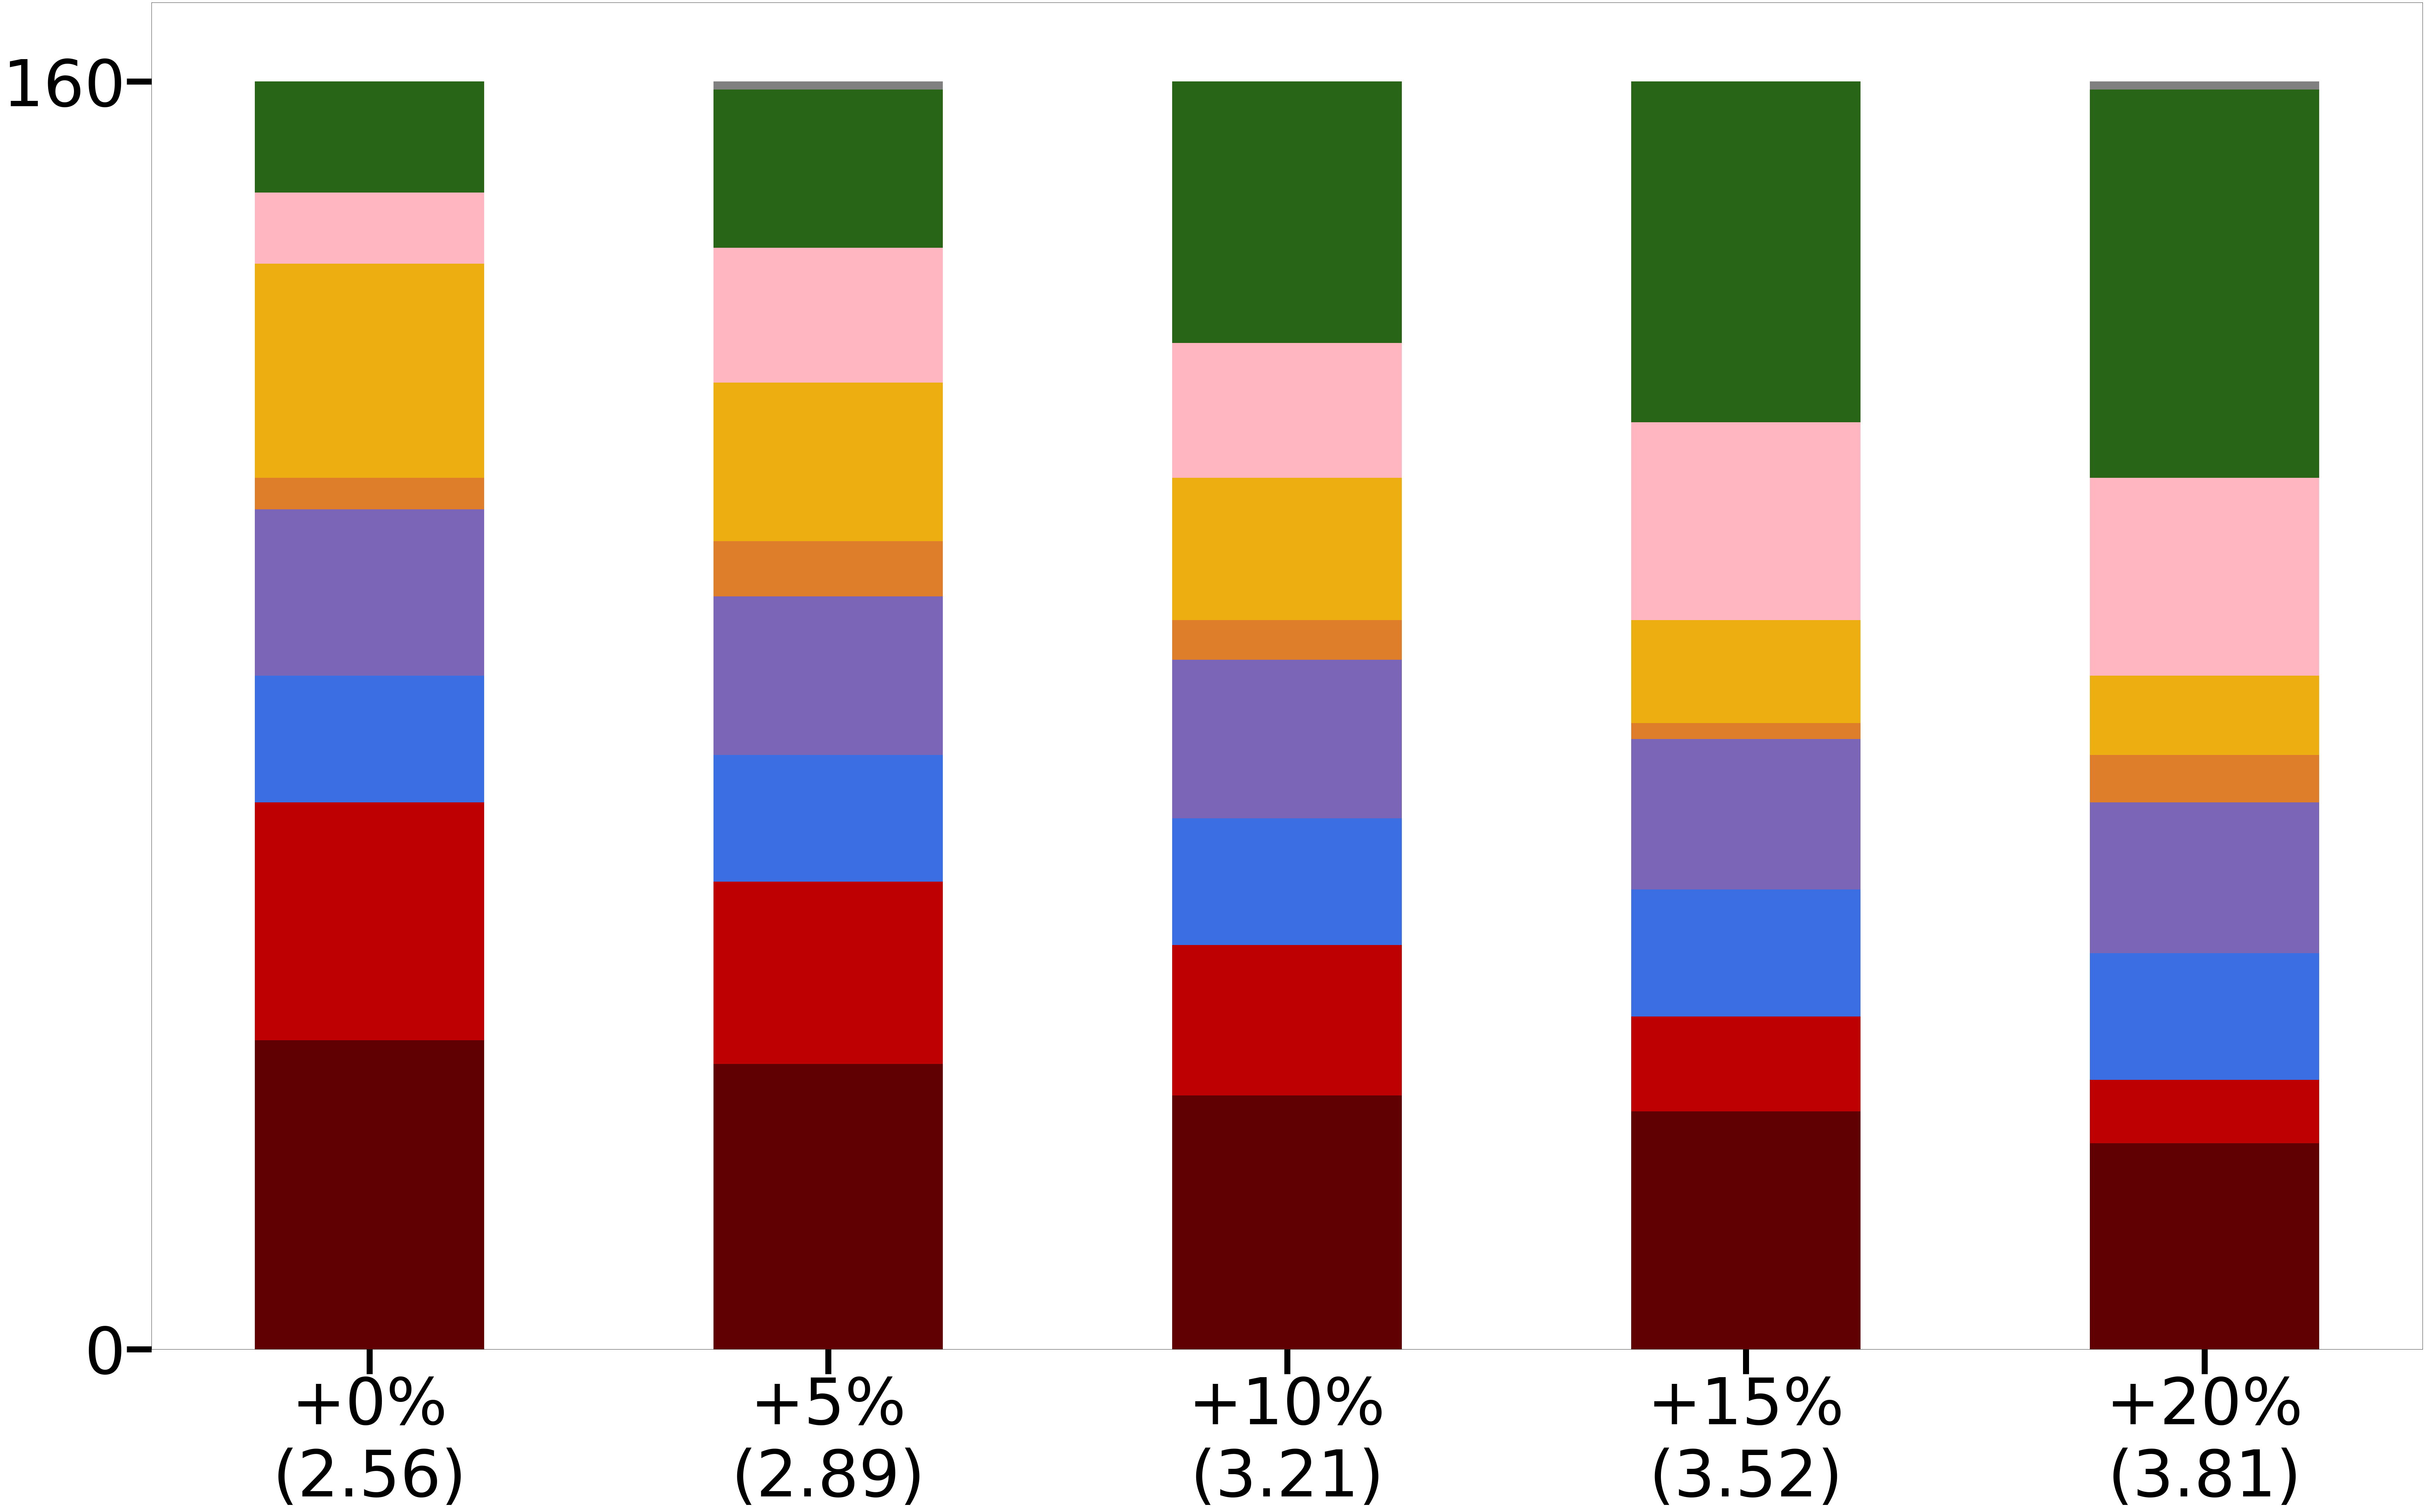

In [1274]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
cropland_2000 = (df['%cropland_2000'] * df['ha_per_pixel']).sum()
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']



values = [e+'\n('+str(r/1e+09)+')' for e, r in zip(['+0%' , '+5%', '+10%', '+15%', '+20%'], rng)]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([14, 20, 33, 43, 49])
cat3 = np.array([21, 20, 20, 19, 19])
cat4 = np.array([39, 36, 32, 30, 26])
cat5 = np.array([30, 23, 19, 12, 8])
cat6 = np.array([4, 7, 5, 2, 6])
cat7 = np.array([27, 20, 18, 13, 10])
cat8 = np.array([9, 17, 17, 25, 25])
cat9 = np.array([0, 1, 0, 0, 1])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

plt.figure(figsize=(115, 70))
plt.xticks(ind, values, fontsize=182)
# plt.xlabel('\n Cropland change w.r.t. 2000\nin billions of hectares', fontsize=70)
plt.ylim([0,170])
plt.yticks([0, 160],fontsize=182)
# plt.ylabel('Number of countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')

ax = plt.gca()
ax.tick_params(width=17, length=70, color='black')
# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA for crop yield

In [811]:
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']
suffices = []
all_counts = []

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
values = np.array([.65, .8, .9, 1., 1.15, 1.25, 1.5, 1.75])
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050', '2000']].set_index('Scenario')

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']

for value in list(values):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    for country in list(countries):
        my_diet = cnty_diets[cnty_diets['Region']==country]['2000'].mean()
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')
    
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
                
            df_dup = df_ssp[df_ssp['ISO3']==country].copy()
            df_dup['cal_per_ha_pred'] = df_dup['cal_per_ha_2000'].apply(lambda x: value * x)

            df_dup.loc[:, 'calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_dup, cntry=country, year=2050, diet=my_diet)
    
        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')
    
    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [428]:
categories = [h for h in header if h != 'Outliers']

for count in all_counts:
    for category in categories:
        if not category in list(count.index):
            count.loc[category, 'ISO3'] = []
            
inter = [set.intersection(*map(set,[count['ISO3'][category] for count in all_counts])) for category in categories]
new_counts = dict(zip(categories, inter))

out = pd.DataFrame(columns=pivot_cols)
out['value'] = values


for i, value in enumerate(list(values)):
        for category in new_counts:
            for ssp in range(5):
                if new_counts[category]:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['ISO3'].isin(new_counts[category])]['ssp'+str(ssp+1)].mean()
                else:
                    out.loc[i, 'ssp'+str(ssp+1)+'_'+category] = \
                    suffices[i][suffices[i]['category']==category]['ssp'+str(ssp+1)].mean()

In [812]:
all_counts_yield = all_counts

In [430]:
out.to_csv('sa_yield_new.csv', index=False)

In [813]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16, 16, 16, 16],
 [1, 1, 1, 2, 3, 7, 36, 46],
 [25, 25, 25, 25, 25, 25, 22, 21],
 [45, 43, 43, 40, 39, 38, 36, 35],
 [43, 39, 37, 31, 23, 19, 12, 11],
 [0, 0, 0, 0, 2, 3, 3, 4],
 [29, 29, 29, 29, 28, 18, 12, 9],
 [1, 7, 9, 16, 24, 34, 23, 18],
 [0, 0, 0, 1, 0, 0, 0, 0])

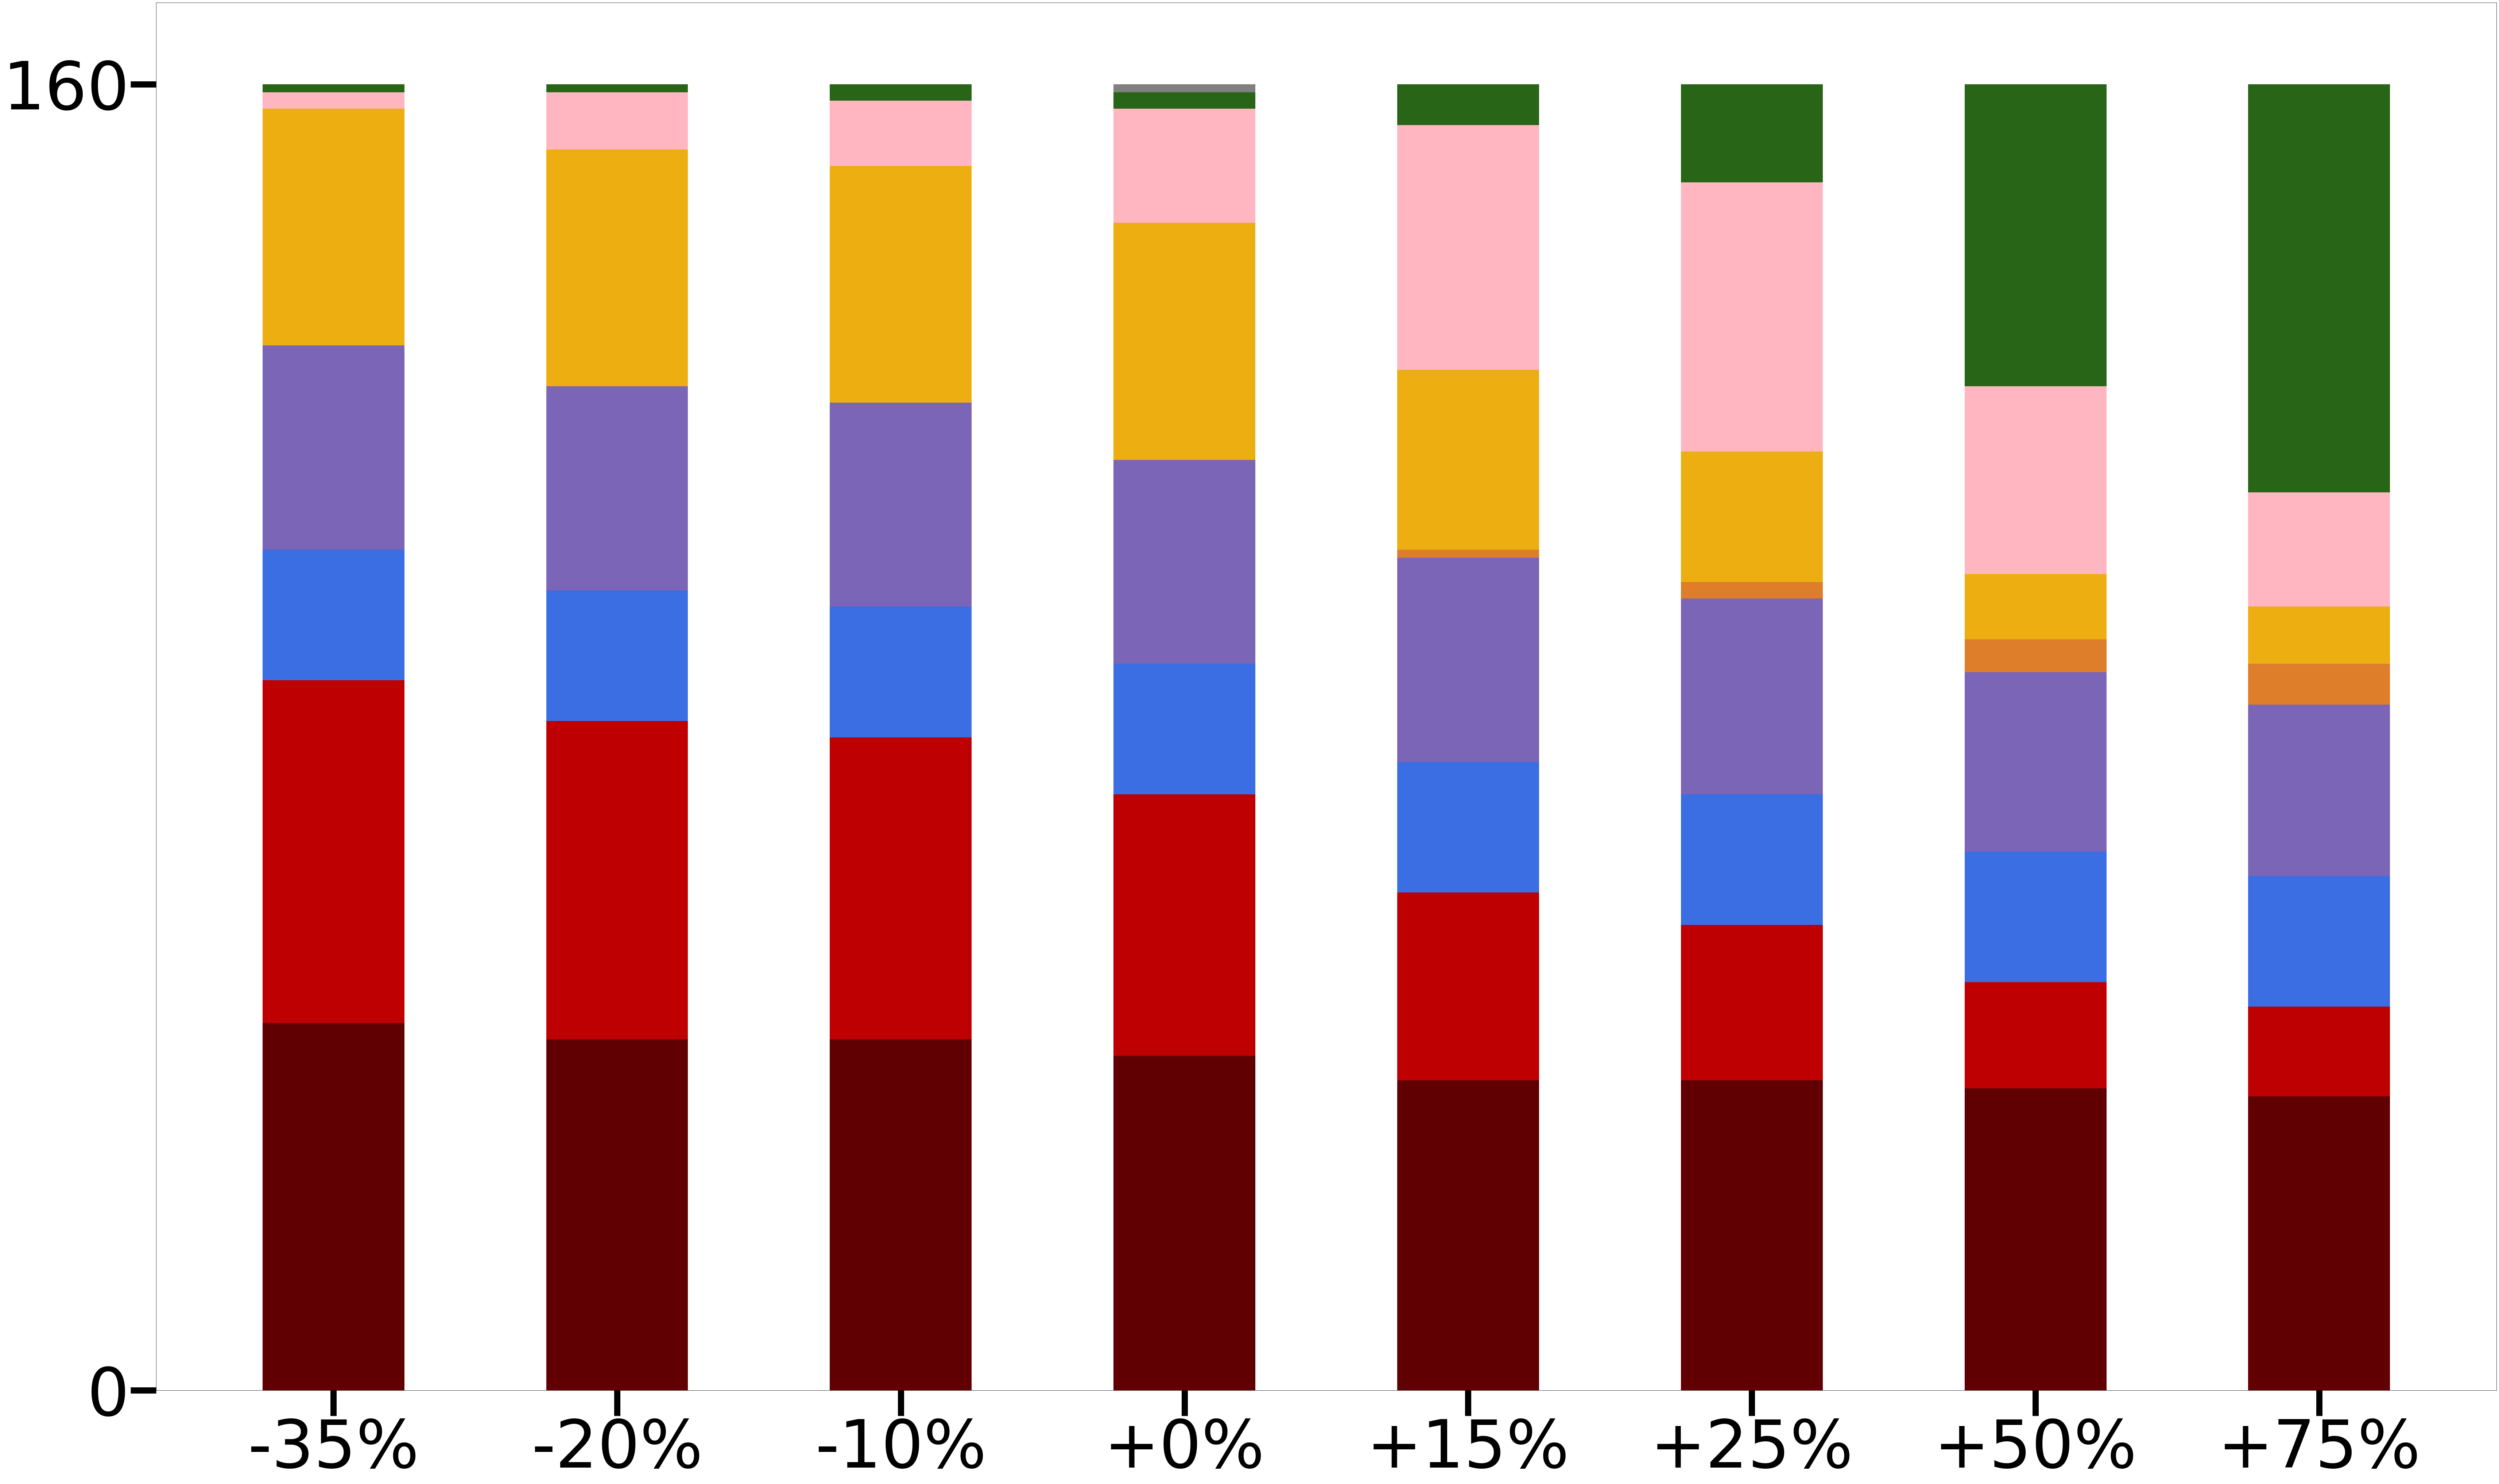

In [1264]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Most vulnerable (India)', 'Newly vulnerable (Mexico)', 'Exporters (Argentina)', 'Importers (Singapore)',
             'Vulnerable but improving (Morocco)', 'Decreasing but not as vulnerable (Italy)', 'Highly variable',  'Increasing sufficiency (Norway)', 
 'Global caloric sufficiency']

values = [str(e)+'%' for e in list(np.round(100 * (np.array([.65, .8, .9, 1., 1.15, 1.25, 1.5, 1.75])-1), 2))]
values = ['-35%', '-20%', '-10%', '+0%', '+15%', '+25%', '+50%', '+75%']
cat1 = np.array([16, 16, 16, 16, 16, 16, 16, 16])
cat2 = np.array([1, 1, 2, 2, 5, 12, 37, 50])
cat3 = np.array([25, 25, 25, 25, 25, 24, 22, 21])
cat4 = np.array([45, 43, 43, 41, 38, 38, 37, 36])
cat5 = np.array([42, 39, 37, 32, 23, 19, 13, 11])
cat6 = np.array([0, 0, 0, 0, 1, 2, 4, 5])
cat7 = np.array([29, 29, 29, 29, 22, 16, 8, 7])
cat8 = np.array([2, 7, 8, 14, 30, 33, 23, 14])
cat9 = np.array([0, 0, 0, 1, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

plt.figure(figsize=[115,70])
plt.xticks(ind, values, fontsize=182)
# plt.xlabel('\nCrop yield change (w.r.t. 2000)', fontsize=70)
plt.ylim([0,170])
plt.yticks([0, 160],fontsize=182)
# plt.ylabel('Number of countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')

# plt.axis('off')
# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=100, ncol=1, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')

ax = plt.gca()
ax.tick_params(width=17, length=70, color='black')
plt.show()

In [547]:
# function that generates samples, calculates cal_suf for parametric variables ['food_waste', 'diet', 'feed_food_factor', 'pop_fact']
# returns  tuples of (sample, cal_suf)
# discriminates by year, ssp and country if need be

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]

def sensitivity(random=False, var='food_waste', value=np.array([.5, .75, 1., 1.25, 1.5]), ssp=1, year=2050, country=None, **kwargs):
    
    data_path = 'outputs/compare/'
    df_ssp = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
    
    if country:
        df_ssp = df_ssp[df_ssp['ISO3']==country]

    if random:
        sample = sample_var(**kwargs)
        
    else:
        sample = value
    if var=='food_waste':
        sufficiency = cal_suff(df_ssp, year=year, cntry=country, food_waste=sample, diet=diets[ssp-1])
        
    if var=='diet':
        sample = sample*diets[ssp-1]
        sufficiency = cal_suff(df_ssp, year=year, cntry=country, diet=sample*diets[ssp-1])

    if var=='feed_food_factor':
        sufficiency = cal_suff(df_ssp, year=year, cntry=country, feed_food_factor=sample, diet=diets[ssp-1])
    
    if var=='pop_fact':
        sufficiency = cal_suff(df_ssp, year=year, cntry=country, pop_fact=sample, diet=diets[ssp-1])
        
    return sample, sufficiency

sensitivity(var='diet', ssp=5, country='MAR')

(array([0.115 , 0.1725, 0.23  , 0.2875, 0.345 ]),
 array([0.8679205 , 0.85373065, 0.83999733, 0.82669885, 0.81381487]))

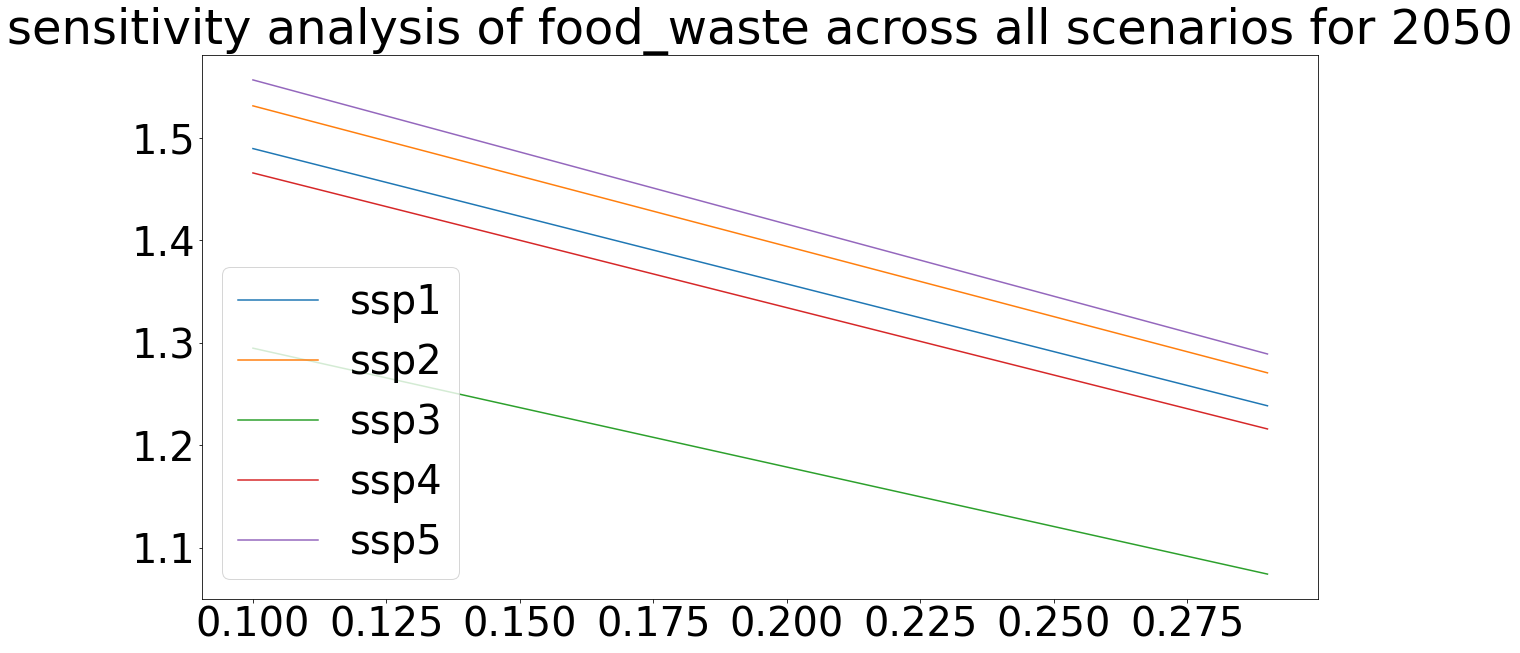

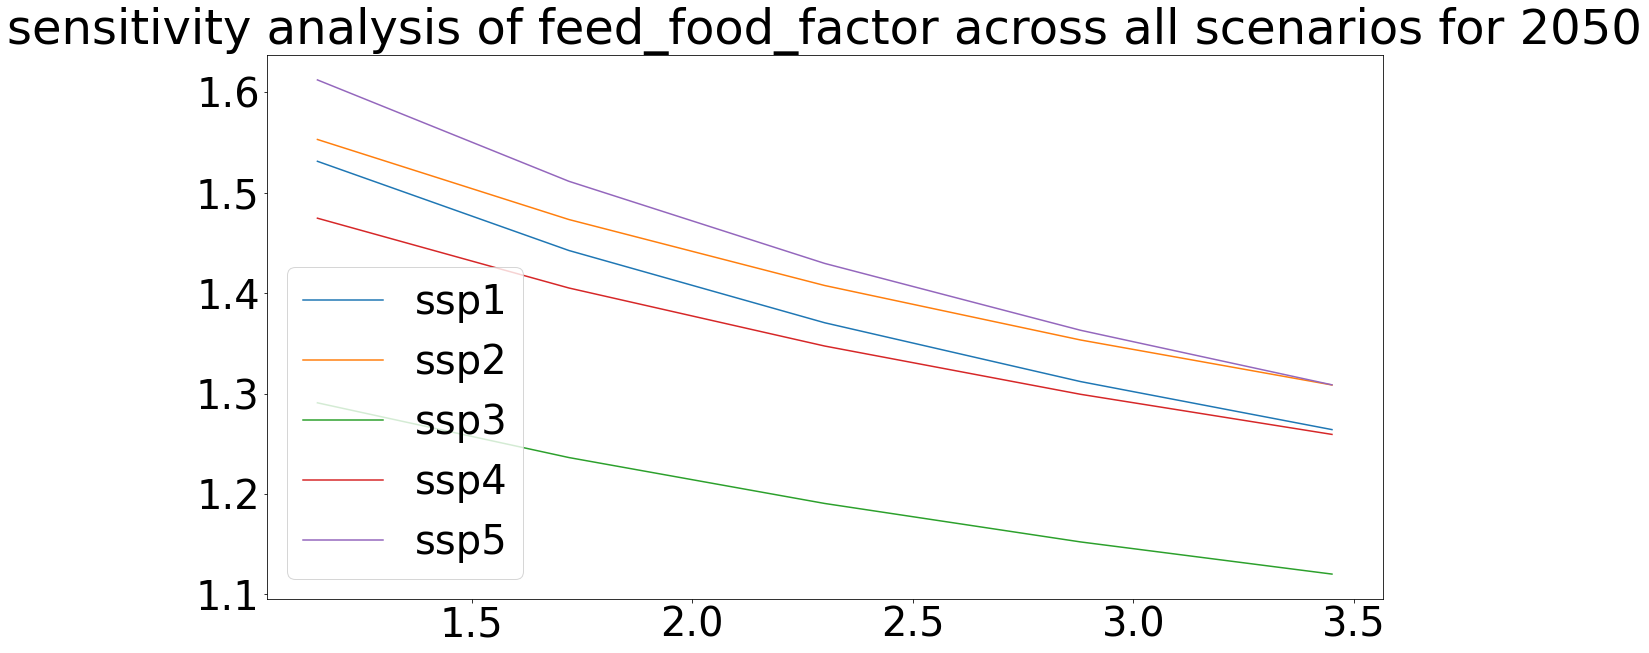

In [548]:
params = ['food_waste', 'feed_food_factor']
lows = [0., 0., 2.3]
highs = [.5, 1., 1.]
dists = ['unif', 'unif', 'norm']
year=2050

cols = [
    'value',
    'ssp1_global',
    'ssp2_global',
    'ssp3_global',
    'ssp4_global',
    'ssp5_global',
]

values = [
    np.round(.19 * np.array([.5, .75, 1., 1.25, 1.5]), 2),
    np.round(2.3 * np.array([.5, .75, 1., 1.25, 1.5]), 2),
]


for s, param in enumerate(params):
    df_global = pd.DataFrame(columns=cols)
    
    plt.figure(figsize=(20,10))
    for i in range(5):
        x, y = sensitivity(var=param, ssp=i+1, year=year, country=None,n=1000, value=values[s])
        df_global.loc[:, 'value'] = x
        df_global.loc[:, 'ssp'+str(i+1)+'_global'] = y
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]
        plt.plot(x, y, label='ssp'+str(i+1))
        plt.legend()
        
    df_global.to_csv('sa_glo_'+param+'_new.csv', index=False)

    plt.title('sensitivity analysis of '+param+' across all scenarios for '+str(year))
    plt.show()

In [549]:
# function that generates samples, calculates cal_suf for predicted values ['cropland', 'yield']
# returns  tuples of (sample, cal_suf)
# discriminates by year, ssp and country if need be

def sensitivity_2(random=False, var='cropland', ssp=1, year=2050, country=None, **kwargs):
    
    var_dict = {'cropland': '%cropland_2050', 'yield':'cal_per_ha_pred', 'population':'population_2050'}
    sufficiency = []
    diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
    
    data_path = 'outputs/compare/'
    df_ssp = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
    
    if random:
        sample = sample_var(**kwargs)
        
    else:
        sample = np.array([.5, .75, 1., 1.25, 1.5])
    
    df_dup = df_ssp.copy()
    if country:
        df_dup = df_ssp[df_ssp['ISO3']==country].copy()
        
    if var == 'yield':
        sample = np.array([.65, .8, .9, 1., 1.15, 1.25, 1.5, 1.75])
    
    for smp in list(sample):
        if var == 'diet':
            sufficiency.append(cal_suff(df_dup, cntry=country, diet=smp*diets[ssp-1]))
        elif var == 'population':
            sufficiency.append(cal_suff(df_dup, cntry=country, pop_fact=smp, diet=diets[ssp-1]))
        elif var == 'yield':
            df_dup['cal_per_ha_pred'] = df_dup['cal_per_ha_2000']*smp
            df_dup['calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            sufficiency.append(cal_suff(df_dup, cntry=country, diet=diets[ssp-1]))
        else:
            df_dup[var_dict[var]] = df_dup[var_dict[var]]*smp
            df_dup['calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            sufficiency.append(cal_suff(df_dup, cntry=country, diet=diets[ssp-1]))
            
    if var == 'diet':
        return (sample * diets[ssp-1]), np.array(sufficiency)
    elif var=='population':
        return ((sample * df_ssp[var_dict[var]].sum())), np.array(sufficiency)
    elif var=='cropland':
        return (sample * (df_ssp[var_dict[var]] * df_ssp['ha_per_pixel']).sum()), np.array(sufficiency)
    else:
        return (sample, np.array(sufficiency))

sensitivity_2(var='yield', ssp=2, country='USA')

(array([0.65, 0.8 , 0.9 , 1.  , 1.15, 1.25, 1.5 , 1.75]),
 array([[3.19160648],
        [3.76011545],
        [4.13912143],
        [4.51812741],
        [5.08663639],
        [5.46564237],
        [6.41315733],
        [7.36067228]]))

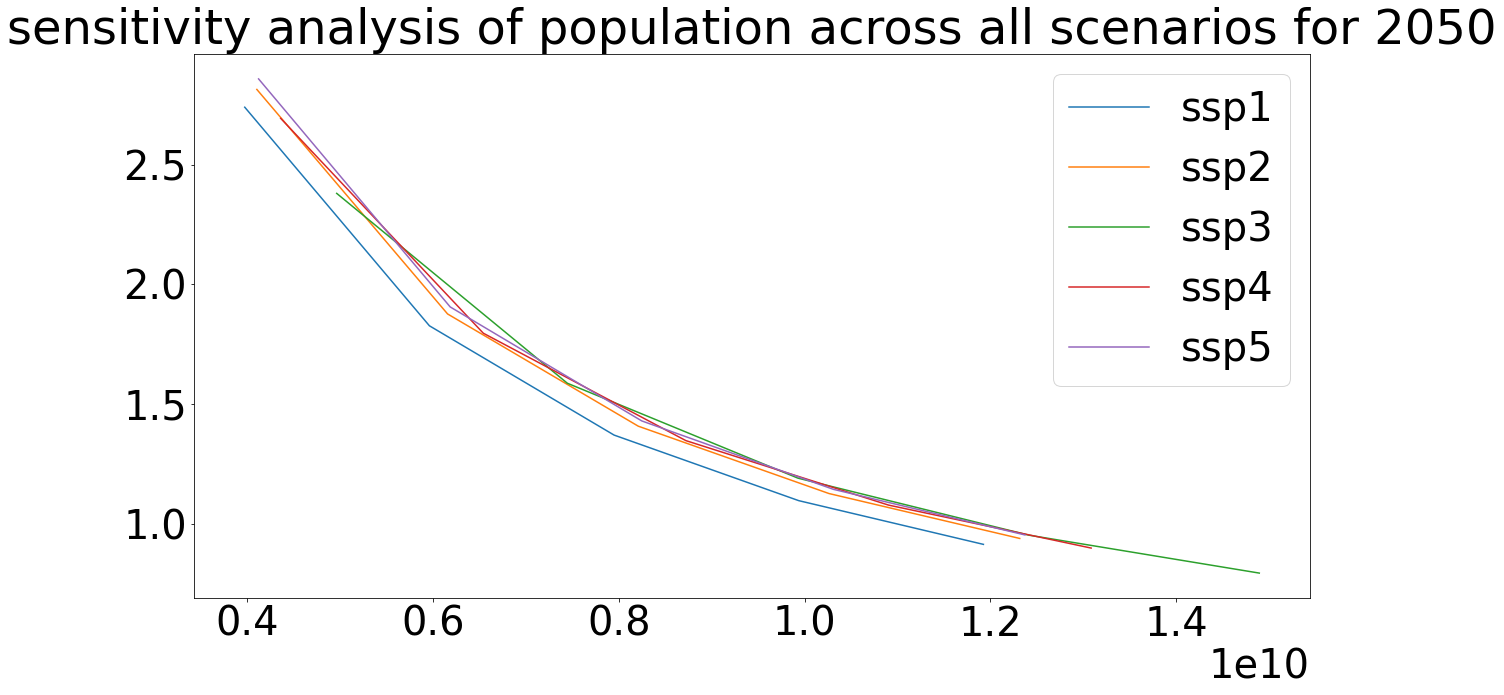

In [555]:
params = ['population']

year=2050

cols = [
    'value',
    'ssp1_global',
    'ssp2_global',
    'ssp3_global',
    'ssp4_global',
    'ssp5_global',
]


# for param, low, high, dist in zip(params, lows, highs, dists):
for param in params:
    plt.figure(figsize=(20,10))
    df_global = pd.DataFrame(columns=cols)
    if param=='yield':
        for i in range(5):
            x, y = sensitivity_2(var=param, ssp=i+1)
            df_global.loc[:, 'value'] = x
            df_global.loc[:, 'ssp'+str(i+1)+'_global'] = y
            idx = np.argsort(x)
            x = x[idx]
            y = y[idx]
            plt.plot(x, y, label='ssp'+str(i+1))
            plt.legend()
        df_global.to_csv('sa_glo_'+param+'.csv', index=False)
    
    else:
        for i in range(5):
            x, y = sensitivity_2(var=param, ssp=i+1)
            to_stack = pd.DataFrame(np.array([x,y]).T, columns=['value', 'ssp'+str(i+1)+'_global'])
            df_global = pd.concat([df_global, to_stack])
            idx = np.argsort(x)
            x = x[idx]
            y = y[idx]
            plt.plot(x, y, label='ssp'+str(i+1))
            plt.legend()
        df_global.sort_values(by='value').interpolate().to_csv('sa_glo_'+param+'.csv', index=False)

    plt.title('sensitivity analysis of '+param+' across all scenarios for '+str(year))
    plt.show()

In [556]:
df_cat = pd.read_csv('sa_population_new.csv')
df_out = pd.DataFrame(columns=df_cat.columns)
df_out['value'] = df_global['value'].copy()
categ_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']

for i in range(5):
    for (j,col) in enumerate(categ_cols):
        if col[:4] == 'ssp'+str(i+1):
            df_out.iloc[(5*i):(5*(i+1)), j] = df_cat[col]

for col in df_out.columns:
    df_out[col] = df_out[col].astype('float')
    
df_out.sort_values(by='value').interpolate().to_csv('inter_population_out.csv', index=False)

In [539]:
[
    'Exporters',
    'Importers',
    'Increasing sufficiency',
    'Vulnerable but improving',
    'Decreasing but not as vulnerable',
    'Newly vulnerable',
    'Most vulnerable',
    'Highly variable'
]
l1 = all_counts[6]['ISO3']['Importers']
l2 = all_counts[7]['ISO3']['Increasing sufficiency']

len([l for l in l2 if l in l1]), [l for l in l2 if l in l1]

(1, ['NOR'])

In [531]:
160 - (16+21+36+3+8+11+35+14)

16

In [790]:
diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
for j in range(5):
    l = []
    for i in range(5):
        df_ = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for cnt in all_counts_feed_food[j]['ISO3']['Newly vulnerable']:
            try:
                my_diet = cnty_diets[cnty_diets['Region']==cnt]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
            
            l.append(cal_suff(df_[df_['ISO3']==cnt], cntry=cnt, diet=my_diet))
    print('average at value '+str(j+1))
    print(np.mean(l))

average at value 1
0.9090707285311707
average at value 2
1.023453701694343
average at value 3
1.0570400697650337
average at value 4
1.1488657991727993
average at value 5
1.1602770676985217


In [808]:
l1 = all_counts_crop[0]['ISO3']['Newly vulnerable']# + all_counts_diet[0]['ISO3']['Most vulnerable'] + all_counts_diet[0]['ISO3']['Newly vulnerable']
l2 = all_counts_crop[4]['ISO3']['Increasing sufficiency']# + all_counts_diet[4]['ISO3']['Most vulnerable'] + all_counts_diet[4]['ISO3']['Newly vulnerable']

len([l for l in l2 if l in l1]), [l for l in l2 if l in l1]


(7, ['BOL', 'COL', 'GUY', 'IRL', 'NAM', 'TJK', 'ZAF'])

In [763]:
for i in range(5):
    df = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
    
    print(cal_suff(df, diet=diets[i], feed_food_factor=1.))

1.7802906677858426
1.7919154947192169
1.4844529398870547
1.697614493173778
1.857114403099673


In [823]:
suffices[5].groupby('category').mean()[['calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']].to_csv('+25%_mean.csv')

In [885]:
np.mean(diets)*.5

0.10961674219691364

In [1243]:
def expansion(x, y):
    if x==0:
        return 0
    else:
        return max(min(1., x+(y-1)),0)
l=[]
pops = []
vals = [1.1, 1.25, 1.5, .9, .75, .5]
# df = pd.read_csv(data_path+'ssp'+str(2)+'_compare_new.csv')

for val in vals:
    df_dup = df.copy()
#     df_dup['%cropland_2050'] = df_dup['%cropland_2050'].apply(lambda x: expansion(x, val))

#     df_dup['cal_per_ha_pred'] = df_dup['cal_per_ha_pred'].apply(lambda x: x*val)
#     df_dup['calories_2050'] = df_dup['cal_per_ha_pred'] * df_dup['%cropland_2050'] * df_dup['ha_per_pixel']
    l.append(cal_suff(df_dup, diet=diets[1], pop_fact=val)-cal_suff(df, diet=diets[1]))
    
l

[-0.12552388963322558,
 -0.27615255719309584,
 -0.46025426198849306,
 0.1534180873294977,
 0.4602542619884933,
 1.3807627859654794]

In [1235]:
get_population(df)*(1-val)/1e+9

1.06737689162

In [1016]:
df_dup['%cropland_2050'] = df_dup['%cropland_2050'].apply(lambda x: expansion(x, 1.1))
print((df_dup['%cropland_2050'] * df_dup['ha_per_pixel']).sum()/1e+9)

3.45203538680336
